In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import pyswarm
from autograd import jacobian
import warnings
import random

warnings.filterwarnings(action='ignore')

import random
import copy
import math
import sys
import matplotlib.pyplot as plt

 ## Part 1
 

In [2]:
x_k = [3 * x / 1000 for x in range(1001)]
y_k = []

for k in range(len(x_k)):
    f_x = 1 / (x_k[k] ** 2  - 3 * x_k[k] + 2)
    if f_x < -100:
        y_k.append(-100 + np.random.normal())
    elif -100 <= f_x <= 100:
        y_k.append(f_x + np.random.normal())
    else:
        y_k.append(100 + np.random.normal())

In [3]:
def rational_func(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

In [4]:
def mse_func(x):
    sum = 0
    for i in range(1001):
        sum += (rational_func(x_k[i], x[0], x[1], x[2], x[3]) - y_k[i])  ** 2
    
    return sum

In [5]:
def sim_anneal(func):
    return scipy.optimize.basinhopping(func, x0=([0.5, 0.5, 0.5, 0.5]), minimizer_kwargs={'method': 'BFGS'})

def diff_evo(func):
    return scipy.optimize.differential_evolution(func, bounds=[(-2, 2), (-2, 2), (-2, 2), (-2, 2)], tol=0.001)

def neldermead_search(func):
    return scipy.optimize.minimize(func, x0=([0.5, 0.5, 0.5, 0.5]), method='Nelder-Mead', tol=0.001)

def lev_marq_alg(func, x, y):
    return scipy.optimize.curve_fit(func, xdata=x, ydata=y, method='lm')

In [6]:
sa_res = sim_anneal(mse_func).x
de_res = diff_evo(mse_func).x
ns_res = neldermead_search(mse_func).x
lm_res = lev_marq_alg(rational_func, x_k, y_k)[0]

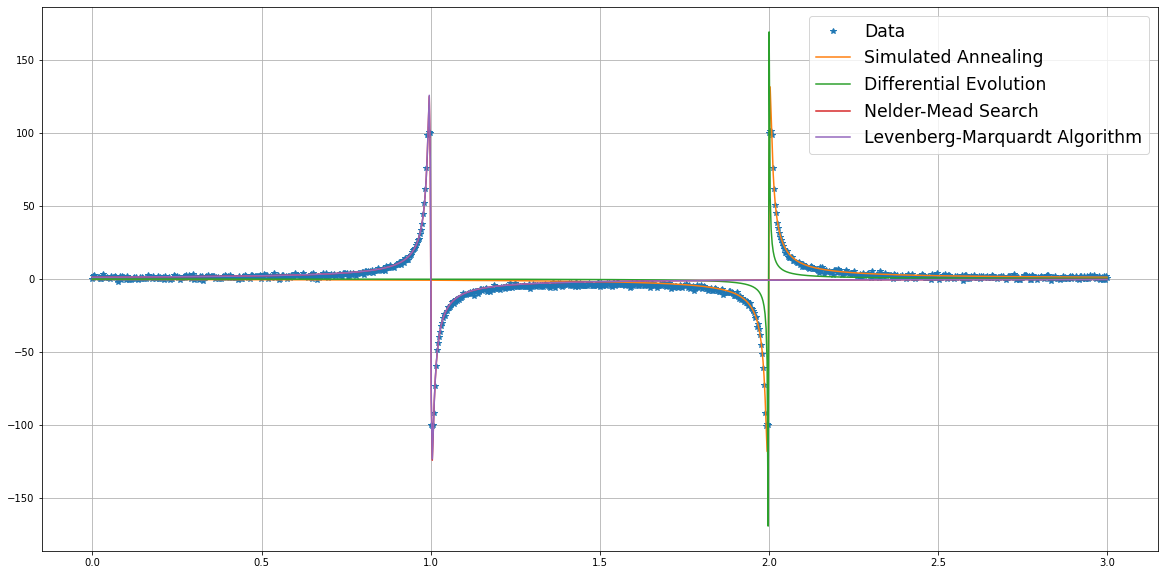

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, "*", label='Data')
plt.grid()

y = [rational_func(x, sa_res[0], sa_res[1], sa_res[2], sa_res[3]) for x in x_k]
plt.plot(x_k, y, label='Simulated Annealing')

y = [rational_func(x, de_res[0], de_res[1], de_res[2], de_res[3]) for x in x_k]
plt.plot(x_k, y, label='Differential Evolution')

y = [rational_func(x, ns_res[0], ns_res[1], ns_res[2], ns_res[3]) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search')

y = [rational_func(x, lm_res[0], lm_res[1], lm_res[2], lm_res[3]) for x in x_k]
plt.plot(x_k, y, label='Levenberg-Marquardt Algorithm')

plt.legend(fontsize='xx-large')
plt.savefig('11.54_results.png', dpi=300)

## Table

In [8]:
def sim_anneal_for_table(func):
    sa = scipy.optimize.basinhopping(func, x0=([0.5, 0.5, 0.5, 0.5]), minimizer_kwargs={'method': 'BFGS'})
    return sa.nit, sa.nfev, sa.x[0], sa.x[1], sa.x[2], sa.x[3]

def diff_evo_for_table(func):
    de = scipy.optimize.differential_evolution(func, bounds=[(-2, 2), (-2, 2), (-2, 2), (-2, 2)], tol=0.001)
    return de.nit, de.nfev, de.x[0], de.x[1], de.x[2], de.x[3]
     
def neldermead_search_for_table(func):
    ns = scipy.optimize.minimize(func, x0=([0.5, 0.5, 0.5, 0.5]), method='Nelder-Mead', tol=0.001)
    return ns.nit, ns.nfev, ns.x[0], ns.x[1], ns.x[2], ns.x[3]

def lev_marq_alg_for_table(func, x, y):
    lma = scipy.optimize.curve_fit(func, xdata=x, ydata=y, method='lm')
    popt, pcov, infodict, errmsg, ier = scipy.optimize.curve_fit(func, xdata=x, ydata=y, method='lm', full_output=True)
    lma_1 = infodict
    return lma_1['nfev'], lma[0][0], lma[0][1], lma[0][2], lma[0][3]

In [9]:
results_table = pd.DataFrame(columns=['method', 'num_of_iterations',
                                      'num_of_f(x)_calculations', 'a', 'b', 'c', 'd'])

In [10]:
num_iter_sa, num_f_culc_sa, culc_a_sa, culc_b_sa, culc_d_sa, culc_c_sa = sim_anneal_for_table(mse_func)
num_iter_de, num_f_culc_de, culc_a_de, culc_b_de, culc_d_de, culc_c_de = diff_evo_for_table(mse_func)
num_iter_ns, num_f_culc_ns, culc_a_ns, culc_b_ns, culc_d_ns, culc_c_ns = neldermead_search_for_table(mse_func)
num_f_culc_lma, culc_a_lma, culc_b_lma, culc_d_lma, culc_c_lma = lev_marq_alg_for_table(rational_func, x_k, y_k)


results_table = results_table.append({'method' : 'Simulated Annealing', 'num_of_iterations': num_iter_sa,
                    'num_of_f(x)_calculations': num_f_culc_sa, 
                    'a' : culc_a_sa, 'b' : culc_b_sa,
                    'd' : culc_d_sa, 'c' : culc_c_sa}, ignore_index=True)

results_table = results_table.append({'method' : 'Differential Evolution', 'num_of_iterations': num_iter_de,
                    'num_of_f(x)_calculations': num_f_culc_de,  
                    'a' : culc_a_de, 'b' : culc_b_de,
                    'd' : culc_d_de, 'c' : culc_c_de}, ignore_index=True)

results_table = results_table.append({'method' : 'Nelder-Mead algorithm', 'num_of_iterations': num_iter_ns,
                    'num_of_f(x)_calculations': num_f_culc_ns,  
                    'a' : culc_a_ns, 'b' : culc_b_ns,
                    'd' : culc_d_ns, 'c' : culc_c_ns}, ignore_index=True)

results_table = results_table.append({'method' : 'Levenberg- Marquardt algorithm', 'num_of_iterations': num_f_culc_lma // 2,
                    'num_of_f(x)_calculations': num_f_culc_lma,  
                    'a' : culc_a_lma, 'b' : culc_b_lma,
                    'd' : culc_d_lma, 'c' : culc_c_lma}, ignore_index=True)

results_table

,method,num_of_iterations,num_of_f(x)_calculations,a,b,c,d
0,Simulated Annealing,100,61534,-1.003974,1.004465,1.00098,-2.000964
1,Differential Evolution,139,8530,-1.000147,1.000388,1.000016,-2.0
2,Nelder-Mead algorithm,405,679,-1.003961,1.004452,1.00098,-2.000964
3,Levenberg- Marquardt algorithm,342,684,-1.00372,1.004184,1.000879,-2.000863


## Part 2 (коммивояжер)

In [11]:
citys=pd.read_table('222.txt',sep=' ')
citys_tuple = list(citys.itertuples(index=False, name=None))

temperature: 500.000, length: 83096.51


<Figure size 432x288 with 0 Axes>

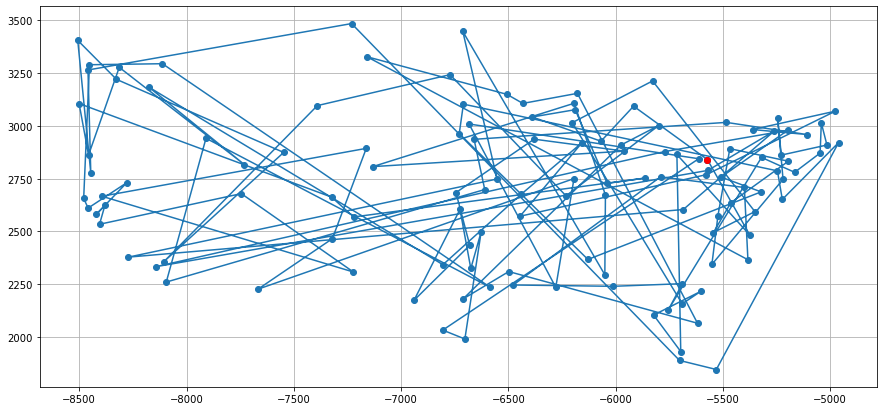

temperature: 399.033, length: 58924.65
temperature: 299.864, length: 50039.26
temperature: 200.803, length: 39579.72
temperature: 100.041, length: 23793.44
temperature: 50.092, length: 19711.11
temperature: 10.022, length: 17895.99
temperature: 5.018, length: 17893.37
temperature: 1.004, length: 17893.37
temperature: 0.099, length: 17893.37


<Figure size 432x288 with 0 Axes>

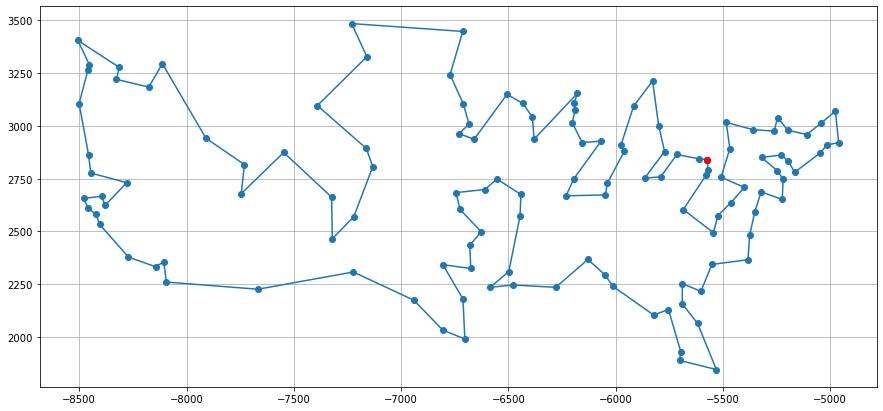

Best route:  [0, 127, 91, 64, 120, 49, 109, 83, 46, 105, 69, 51, 30, 103, 67, 21, 115, 4, 60, 20, 122, 24, 117, 102, 107, 71, 1, 70, 22, 34, 6, 124, 10, 74, 80, 62, 44, 86, 100, 114, 121, 96, 39, 68, 28, 2, 17, 33, 78, 54, 101, 18, 125, 123, 59, 110, 85, 90, 89, 98, 87, 88, 93, 92, 43, 112, 95, 94, 31, 29, 13, 73, 75, 42, 14, 99, 48, 104, 77, 65, 50, 38, 72, 32, 41, 40, 76, 53, 35, 52, 84, 16, 108, 19, 56, 82, 57, 8, 113, 119, 26, 97, 9, 126, 11, 79, 58, 45, 25, 66, 3, 106, 111, 81, 36, 23, 55, 116, 47, 27, 37, 7, 63, 118, 5, 12, 15, 61, 0]


<Figure size 432x288 with 0 Axes>

In [15]:
t_start = 500   # start temperature
t_end = 0.099   # end temperature
steps = 1000    # steps at given temperature
alpha = 0.995   # temperature reduction coefficient
n = 128         # numbers of cities

class Solution:
    def __init__(self):
        self.plan = list(range(n))
        self.plan.append(0)
        self.mutate()
        self.fitness = sys.maxsize

    def mutate(self):
        # inverting randomly selected subpath of random length
        subpath_start = random.randrange(1, n-1)
        subpath_end = random.randrange(subpath_start+2, n+1)
        plan_copy = self.plan[subpath_start:subpath_end]
        plan_copy = plan_copy[::-1]
        self.plan[subpath_start:subpath_end] = plan_copy

    def calc_fitness(self):
        self.fitness = sum([distance_matrix[self.plan[i]][self.plan[i + 1]] for i in range(n)])

def plot():
    x_values = [coords[best.plan[i]][0] for i in range(n + 1)]
    y_values = [coords[best.plan[i]][1] for i in range(n + 1)]
    plt.clf()
    plt.figure(figsize=(15, 7))
    plt.plot(x_values, y_values, 'o-')
    plt.plot(x_values[0], y_values[0], 'ro')
    plt.grid()
    plt.show()

def save_plot():
    x_values = [coords[best.plan[i]][0] for i in range(n + 1)]
    y_values = [coords[best.plan[i]][1] for i in range(n + 1)]
    plt.clf()
    plt.figure(figsize=(15, 7))
    plt.plot(x_values, y_values, 'o-')
    plt.plot(x_values[0], y_values[0], 'ro')
    plt.grid()
    plt.savefig(name_for_plot, dpi=300)
    plt.close()



coords = citys_tuple 

distance_matrix = [[_ for _ in range(n)] for _ in range(n)]
for row in range(n):
    for col in range(n):
        distance_matrix[row][col] = math.sqrt(sum((coords[row][i] - coords[col][i]) ** 2 for i in range(2)))

current = Solution()
current.calc_fitness()
working = copy.deepcopy(current)
best = copy.deepcopy(current)
t = t_start

name_for_plot = 'first_itetation1'


while t > t_end:
    for _ in range(steps):
        f_new = False
        working.mutate()
        working.calc_fitness()
        if working.fitness <= current.fitness:
            f_new = True
        else:
            delta = working.fitness - current.fitness
            p = math.exp(-delta / t)
            if p > random.random():
                f_new = True
        if f_new:
            current = copy.deepcopy(working)
            if current.fitness < best.fitness:
                best = copy.deepcopy(current)
        else:
            working = copy.deepcopy(current)
            
    if (t <= 501.00 and t >= 499.50 or t <= 400.00 and t >= 399.00 or
    t <= 300.00 and t >= 299.50 or t <= 201.00 and t >= 200.00 or
    t <= 100.10 and t >= 100.00 or t <= 50.10 and t >= 50.00 or
    t <= 10.03 and t >= 10.00 or t <= 5.02 and t>= 5.00 or
    t <= 1.005 and t>= 1.00 or t <= 0.0992 and t>= 0.0990): 
        print('temperature: {:5.3f}, length: {:5.2f}'.format(t, best.fitness))
       
    if t <= 501.00 and t >= 499.50 or t <= 0.0992 and t>= 0.0990:
        plot()
        
    if t == 500.00 or t <= 0.0992 and t>= 0.0990: 
        save_plot()
        name_for_plot = 'last_itetation1'
        
    t *= alpha
    
print("Best route: ", best.plan)